<a href="https://colab.research.google.com/github/caralinebruz/data_science_capstone_classification/blob/main/HistGradientBoost_rawdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [350]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import seaborn as sns


from sklearn.decomposition import PCA
from sklearn.cluster import KMeans as KMeans, DBSCAN as DBSCAN
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc, roc_curve, classification_report
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score


from sklearn.pipeline import Pipeline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [351]:
# lets import our data
# /content/drive/MyDrive/data.csv
df = pd.read_csv('/content/drive/MyDrive/data.csv')

In [280]:
# find the number of nan in the original dataset
df.isna().sum().sum()
# 4,914,430

4914430

In [166]:
df.size
# 8,925,150

8925150

In [148]:
# so there are 4914430 / 8925150 * 100 missing values in the original dataframe
print((df.isna().sum().sum()) / (df.size) * 100)

# great! 55 percent of the values in the dataframe are NaN

55.06271603278377


as there are 18,000 rows in the dataset with null value for GDP, rather than introduce bias by imputing the target (class) for each row, drop them



In [353]:
gdp_col = 'owid_gdp_per_capita'

In [352]:
df = df[df[gdp_col].notna()]

In [354]:
df # still huge im ok with it 46489 rows × 138 columns

,iso_code,country,date,jhu_confirmed,jhu_deaths,jhu_recovered,owid_total_cases,owid_new_cases,owid_total_deaths,owid_new_deaths,...,google_mobility_change_parks,google_mobility_change_transit_stations,google_mobility_change_retail_and_recreation,google_mobility_change_residential,google_mobility_change_workplaces,sdsn_new_cases_per_million_smoothed,sdsn_new_deaths_per_million_smoothed,sdsn_effective_reproduction_rate_smoothed,sdsn_positive_test_rate_smoothed,sdsn_overall_transmission
72,ABW,Aruba,2020-03-13,NaN,NaN,NaN,2.0,2.0,NaN,0.0,...,-4.0,-5.0,-10.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN
78,ABW,Aruba,2020-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-41.0,-40.0,-52.0,21.0,-40.0,NaN,NaN,NaN,NaN,NaN
79,ABW,Aruba,2020-03-20,NaN,NaN,NaN,4.0,2.0,NaN,0.0,...,-41.0,-45.0,-53.0,22.0,-41.0,NaN,NaN,NaN,NaN,NaN
80,ABW,Aruba,2020-03-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-52.0,-54.0,-62.0,21.0,-40.0,NaN,NaN,NaN,NaN,NaN
81,ABW,Aruba,2020-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-52.0,-62.0,-70.0,NaN,-46.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64670,ZWE,Zimbabwe,2020-10-26,8303.0,242.0,7797.0,8276.0,7.0,237.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.273500,0.033571,NaN,0.023,1.0
64671,ZWE,Zimbabwe,2020-10-27,8315.0,242.0,7804.0,8303.0,27.0,242.0,5.0,...,NaN,NaN,NaN,NaN,NaN,1.355214,0.057571,NaN,0.025,1.0
64672,ZWE,Zimbabwe,2020-10-28,8320.0,242.0,7845.0,8315.0,12.0,242.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.340786,0.057571,NaN,0.023,1.0
64673,ZWE,Zimbabwe,2020-10-29,8349.0,242.0,7864.0,8320.0,5.0,242.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.273500,0.052786,NaN,0.023,1.0


Create a high correlation filter on the dataset

do not include the dependent variable (class)

Generally, if the correlation between a pair of variables is greater than 0.5-0.6, we should seriously consider dropping one of those variables.

In [237]:
# df.corr()

In [170]:
# sns.set()
# plt.rcParams["figure.figsize"] = (35,35)
# sns.heatmap(df.corr(), annot=True)
# plt.show()

In [355]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [356]:
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
to_drop

['jhu_deaths',
 'jhu_recovered',
 'owid_total_cases',
 'owid_new_cases',
 'owid_total_deaths',
 'owid_total_tests',
 'owid_new_tests',
 'owid_new_tests_smoothed',
 'owid_new_tests_per_thousand',
 'owid_new_tests_smoothed_per_thousand',
 'owid_weekly_excess_mortality_p_score',
 'owid_weekly_excess_mortality_p_score_75_84',
 'owid_weekly_excess_mortality_p_score_85plus',
 'owid_weekly_deaths_2019',
 'owid_weekly_deaths_2018',
 'owid_weekly_deaths_2017',
 'owid_weekly_deaths_2016',
 'owid_weekly_deaths_2015',
 'owid_avg_weekly_deaths_2015_2019',
 'owid_population',
 'owid_aged_65_older',
 'owid_aged_70_older',
 'owid_life_expectancy',
 'ox_c1_school_closing',
 'ox_c2_workplace_closing',
 'ox_c3_cancel_public_events',
 'ox_c5_flag',
 'ox_confirmed_cases',
 'ox_confirmed_deaths',
 'ox_stringency_index',
 'ox_stringency_index_for_display',
 'ox_stringency_legacy_index',
 'ox_stringency_legacy_index_for_display',
 'ox_government_response_index',
 'ox_government_response_index_for_display',
 '

In [319]:
len(to_drop)

89

In [357]:
# Drop features 
df.drop(to_drop, axis=1, inplace=True)

In [201]:
df

,iso_code,country,date,jhu_confirmed,owid_new_cases,owid_new_deaths,owid_total_cases_per_million,owid_new_cases_per_million,owid_total_deaths_per_million,owid_new_deaths_per_million,...,yougov_support_stopping_international_flights,yougov_support_quarantine_chinese_travellers,yougov_confidence_in_health_authorities,google_mobility_change_grocery_and_pharmacy,google_mobility_change_parks,google_mobility_change_transit_stations,google_mobility_change_residential,google_mobility_change_workplaces,sdsn_new_deaths_per_million_smoothed,sdsn_overall_transmission
72,ABW,Aruba,2020-03-13,NaN,2.0,0.0,18.733,18.733,NaN,0.000,...,NaN,NaN,NaN,40.0,-4.0,-5.0,1.0,3.0,NaN,NaN
78,ABW,Aruba,2020-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-5.0,-41.0,-40.0,21.0,-40.0,NaN,NaN
79,ABW,Aruba,2020-03-20,NaN,2.0,0.0,37.465,18.733,NaN,0.000,...,NaN,NaN,NaN,-7.0,-41.0,-45.0,22.0,-41.0,NaN,NaN
80,ABW,Aruba,2020-03-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-19.0,-52.0,-54.0,21.0,-40.0,NaN,NaN
81,ABW,Aruba,2020-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-36.0,-52.0,-62.0,NaN,-46.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64670,ZWE,Zimbabwe,2020-10-26,8303.0,7.0,1.0,556.822,0.471,15.946,0.067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033571,1.0
64671,ZWE,Zimbabwe,2020-10-27,8315.0,27.0,5.0,558.638,1.817,16.282,0.336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057571,1.0
64672,ZWE,Zimbabwe,2020-10-28,8320.0,12.0,0.0,559.446,0.807,16.282,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057571,1.0
64673,ZWE,Zimbabwe,2020-10-29,8349.0,5.0,0.0,559.782,0.336,16.282,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052786,1.0


In [321]:
df.isnull().sum() * 100 / len(df)

iso_code                                         0.000000
country                                          0.000000
date                                             0.000000
jhu_confirmed                                    5.962701
owid_total_cases_per_million                     7.485642
owid_new_cases_per_million                       1.374519
owid_total_deaths_per_million                   22.000903
owid_new_deaths_per_million                      1.374519
owid_total_tests_per_thousand                   57.314634
owid_tests_per_case                             56.043365
owid_positive_rate                              55.333520
owid_tests_units                                50.310826
owid_stringency_index                           10.221773
owid_weekly_excess_mortality_p_score_0_14       97.732797
owid_weekly_excess_mortality_p_score_15_64      97.728495
owid_population_density                          0.447418
owid_median_age                                  3.086752
owid_gdp_per_c

Let's try to just use Hist Gradient Boost Classifier first, 

Note the categorical features should be specified, and may be specified by index among others.
gbdt = HistGradientBoostingClassifier(categorical_features=[0])

In [84]:
# gbdt = HistGradientBoostingClassifier(categorical_features=[0,1,2])

In [358]:
df['owid_gdp_per_capita'].describe

<bound method NDFrame.describe of 72       35973.781
78       35973.781
79       35973.781
80       35973.781
81       35973.781
           ...    
64670     1899.775
64671     1899.775
64672     1899.775
64673     1899.775
64674     1899.775
Name: owid_gdp_per_capita, Length: 46489, dtype: float64>

In [359]:
# make some classes
# get the median of the dataframe
# A = df['owid_gdp_per_capita'].quantile(q=0.2)
# B = df['owid_gdp_per_capita'].quantile(q=0.4)
# C = df['owid_gdp_per_capita'].quantile(q=0.6)
# D = df['owid_gdp_per_capita'].quantile(q=0.8)

A = df['owid_gdp_per_capita'].quantile(q=0.25)
B = df['owid_gdp_per_capita'].quantile(q=0.5)
C = df['owid_gdp_per_capita'].quantile(q=0.75)
# D = df['owid_gdp_per_capita'].quantile(q=0.8)

A, B, C#, D

(5321.444, 14048.881, 31400.84)

In [361]:
# assign class
# make a new column with the median split, if the movie rating is lower, assign 0, else assign 1

# base
df['Y'] = 'Z'

# if the column value is less than A, assign 'A'
df.loc[df[gdp_col] <= A, 'Y'] = 'A'
df.loc[( (df[gdp_col] > A) & (df[gdp_col] <= B) ), 'Y'] = 'B'
df.loc[( (df[gdp_col] > B) & (df[gdp_col] <= C) ), 'Y'] = 'C'
# df.loc[( (df[gdp_col] > C) & (df[gdp_col] <= D) ), 'Y'] = 'D'
# df.loc[df[gdp_col] > D, 'Y'] = 'E'
df.loc[df[gdp_col] > C, 'Y'] = 'D'

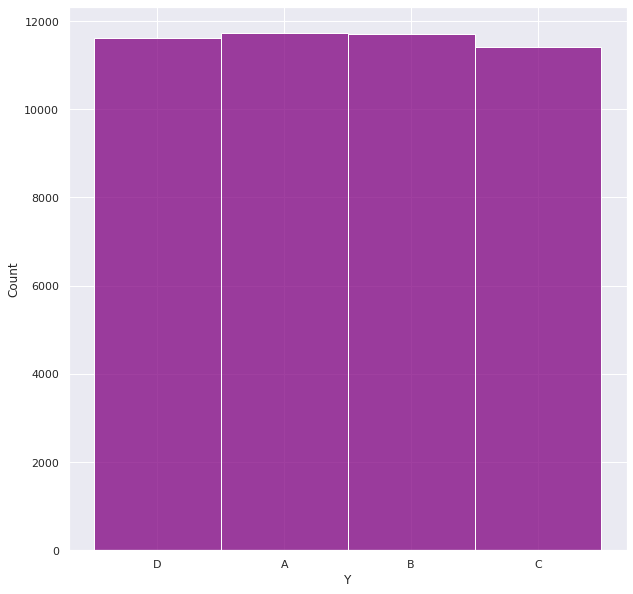

In [362]:
plt.rcParams["figure.figsize"] = (10,10)
sns.histplot(df['Y'], color="purple")
# plt.plot(random_classifier, random_classifier, 'r--')
# plt.xlabel("FPR")
# plt.ylabel("TPR")
# plt.title("ROC Curve: %s" % movie)
plt.show()

# looking pretty balanced now! great.

In [363]:
# split into train/test
df['Y'].describe()

count     46489
unique        4
top           A
freq      11739
Name: Y, dtype: object

Now that I assigned a new class variable, i can drop the previous numeric column (which could be used for regression, i suppose)

In [364]:
import random

def make_split(M,pct):

    print("picking %s percent of country codes" % pct)
    all_codes = df['iso_code'].unique().tolist()
    total = float(len(all_codes))
    
    num_picked = round(pct * total)
    print("must pick %s / %s = %s " % (pct, total, num_picked))

    test = random.sample(all_codes, k=num_picked) # sample works without replacement
    test = sorted(test)
    
    print("test:")
    print(test)
    test_df = M.loc[M['iso_code'].isin(test)]
    # print(test_df)

    s = set(test)
    train = [x for x in all_codes if x not in s]

    print("train:")
    print(train)
    train_df = M.loc[M['iso_code'].isin(train)]
    # print(train_df)
    
    return test_df, train_df

In [365]:
pct = 0.2
test_df, train_df = make_split(df,pct)

picking 0.2 percent of country codes
must pick 0.2 / 184.0 = 37 
test:
['ATG', 'AUS', 'BHR', 'BMU', 'BRN', 'CRI', 'DNK', 'EGY', 'ERI', 'EST', 'GIN', 'GNQ', 'GUY', 'HRV', 'HUN', 'ISL', 'ITA', 'JAM', 'KOR', 'LSO', 'MDA', 'MDV', 'MRT', 'MYS', 'NGA', 'PAN', 'POL', 'RUS', 'SLE', 'STP', 'SVK', 'SVN', 'SWE', 'TJK', 'UKR', 'UZB', 'VCT']
train:
['ABW', 'AFG', 'AGO', 'ALB', 'ARE', 'ARG', 'ARM', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BOL', 'BRA', 'BRB', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DOM', 'DZA', 'ECU', 'ESP', 'ETH', 'FIN', 'FJI', 'FRA', 'GAB', 'GBR', 'GEO', 'GHA', 'GMB', 'GNB', 'GRC', 'GRD', 'GTM', 'HKG', 'HND', 'HTI', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISR', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KNA', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LKA', 'LTU', 'LUX', 'LVA', 'MAR', 'MDG', 'MEX', 'MHL', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MN

In [366]:
drop_cols = [gdp_col]
# drop_cols = []
drop_cols.extend(['date','iso_code','country','owid_tests_units'])

# df.drop(drop_cols, axis=1, inplace=True)
train_df.drop(drop_cols, axis=1, inplace=True)
test_df.drop(drop_cols, axis=1, inplace=True)


In [367]:
# check that it worked
train_df.columns.tolist()

['jhu_confirmed',
 'owid_new_deaths',
 'owid_total_cases_per_million',
 'owid_new_cases_per_million',
 'owid_total_deaths_per_million',
 'owid_new_deaths_per_million',
 'owid_total_tests_per_thousand',
 'owid_tests_per_case',
 'owid_positive_rate',
 'owid_stringency_index',
 'owid_weekly_excess_mortality_p_score_0_14',
 'owid_weekly_excess_mortality_p_score_15_64',
 'owid_weekly_excess_mortality_p_score_65_74',
 'owid_weekly_deaths_2020',
 'owid_population_density',
 'owid_median_age',
 'owid_extreme_poverty',
 'owid_cardiovasc_death_rate',
 'owid_diabetes_prevalence',
 'owid_female_smokers',
 'owid_male_smokers',
 'owid_handwashing_facilities',
 'owid_hospital_beds_per_thousand',
 'ox_c1_flag',
 'ox_c2_flag',
 'ox_c3_flag',
 'ox_c4_restrictions_on_gatherings',
 'ox_c4_flag',
 'ox_c5_close_public_transport',
 'ox_c6_stay_at_home_requirements',
 'ox_c6_flag',
 'ox_c7_restrictions_on_internal_movement',
 'ox_c7_flag',
 'ox_c8_international_travel_controls',
 'ox_e1_income_support',
 'ox_

In [368]:
# now isolate the x and y values
X_train = train_df.loc[:, train_df.columns != 'Y']
Y_train = train_df['Y']

X_test = test_df.loc[:, test_df.columns != 'Y']
Y_test = test_df['Y']

X_train.shape, X_test.shape

((37098, 60), (9391, 60))

In [369]:
train_df.columns.tolist()

['jhu_confirmed',
 'owid_new_deaths',
 'owid_total_cases_per_million',
 'owid_new_cases_per_million',
 'owid_total_deaths_per_million',
 'owid_new_deaths_per_million',
 'owid_total_tests_per_thousand',
 'owid_tests_per_case',
 'owid_positive_rate',
 'owid_stringency_index',
 'owid_weekly_excess_mortality_p_score_0_14',
 'owid_weekly_excess_mortality_p_score_15_64',
 'owid_weekly_excess_mortality_p_score_65_74',
 'owid_weekly_deaths_2020',
 'owid_population_density',
 'owid_median_age',
 'owid_extreme_poverty',
 'owid_cardiovasc_death_rate',
 'owid_diabetes_prevalence',
 'owid_female_smokers',
 'owid_male_smokers',
 'owid_handwashing_facilities',
 'owid_hospital_beds_per_thousand',
 'ox_c1_flag',
 'ox_c2_flag',
 'ox_c3_flag',
 'ox_c4_restrictions_on_gatherings',
 'ox_c4_flag',
 'ox_c5_close_public_transport',
 'ox_c6_stay_at_home_requirements',
 'ox_c6_flag',
 'ox_c7_restrictions_on_internal_movement',
 'ox_c7_flag',
 'ox_c8_international_travel_controls',
 'ox_e1_income_support',
 'ox_

In [332]:
# hm i guess we need to drop the text columns
# date, country_iso, country
pd.set_option('display.max_rows', 100)


In [333]:
X_train.dtypes

jhu_confirmed                                  float64
owid_total_cases_per_million                   float64
owid_new_cases_per_million                     float64
owid_total_deaths_per_million                  float64
owid_new_deaths_per_million                    float64
owid_total_tests_per_thousand                  float64
owid_tests_per_case                            float64
owid_positive_rate                             float64
owid_stringency_index                          float64
owid_weekly_excess_mortality_p_score_0_14      float64
owid_weekly_excess_mortality_p_score_15_64     float64
owid_population_density                        float64
owid_median_age                                float64
owid_extreme_poverty                           float64
owid_cardiovasc_death_rate                     float64
owid_diabetes_prevalence                       float64
owid_male_smokers                              float64
owid_hospital_beds_per_thousand                float64
ox_c1_flag

In [370]:
# gbdt = HistGradientBoostingClassifier(categorical_features=[0,1,2])

classifier =  HistGradientBoostingClassifier()
classifier.fit(X_train,Y_train)

HistGradientBoostingClassifier()

In [336]:
classifier.get_params()

{'categorical_features': None,
 'early_stopping': False,
 'l2_regularization': 0.0,
 'learning_rate': 0.1,
 'loss': 'auto',
 'max_bins': 255,
 'max_depth': None,
 'max_iter': 100,
 'max_leaf_nodes': 31,
 'min_samples_leaf': 20,
 'monotonic_cst': None,
 'n_iter_no_change': 10,
 'random_state': None,
 'scoring': 'loss',
 'tol': 1e-07,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [337]:
# CVscores = cross_val_score(classifier, X_train, Y_train, scoring='roc_auc', cv=2) 

from sklearn.model_selection import cross_validate

cv_results_gbdt = cross_validate(
    classifier, X_train, Y_train, scoring="neg_mean_absolute_error",
    n_jobs=2
)

In [277]:
# param_grid={'n_estimators':[100,500], 
#             'learning_rate': [0.1,0.05,0.02,0.2],
#             # 'max_depth':[4], 
#             # 'min_samples_leaf':[3], 
#             'max_features':[1.0] } 

In [338]:
cv_results_gbdt

{'fit_time': array([11.01447654, 11.07566476, 10.89361358, 10.57934475,  7.71518683]),
 'score_time': array([0.40583777, 0.40666008, 0.39425874, 0.39546585, 0.26108408]),
 'test_score': array([nan, nan, nan, nan, nan])}

In [371]:
y_pred = classifier.predict(X_test)

In [372]:
y_pred

array(['C', 'C', 'C', ..., 'B', 'B', 'B'], dtype=object)

In [373]:
print("Accuracy of the model is: %.3f" % accuracy_score(y_pred, Y_test))

Accuracy of the model is: 0.660


In [374]:
## Confusion Matrix for the predicted outputs
conf_matrix = confusion_matrix(Y_test, y_pred)
conf_matrix

array([[1065,  623,    0,    0],
       [ 610,  918,  236,    0],
       [   0,  703, 1859,  784],
       [   0,    0,  234, 2359]])

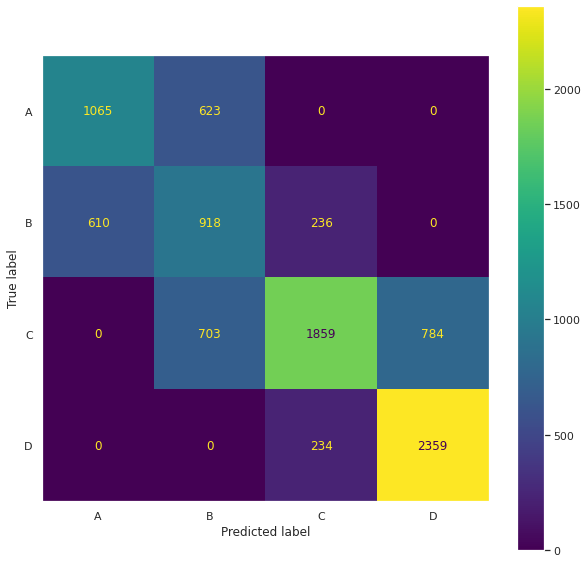

In [375]:
disp=ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=classifier.classes_)
disp.plot()
plt.grid()
plt.show()

In [376]:
confusion_matrix(Y_test, y_pred, normalize="true").diagonal()

array([0.63092417, 0.52040816, 0.55558876, 0.90975704])

In [377]:
report = classification_report(Y_test, y_pred)
print('report:', report, sep='\n')

report:
              precision    recall  f1-score   support

           A       0.64      0.63      0.63      1688
           B       0.41      0.52      0.46      1764
           C       0.80      0.56      0.66      3346
           D       0.75      0.91      0.82      2593

    accuracy                           0.66      9391
   macro avg       0.65      0.65      0.64      9391
weighted avg       0.68      0.66      0.66      9391

